In [127]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from PIL import Image, ImageFilter

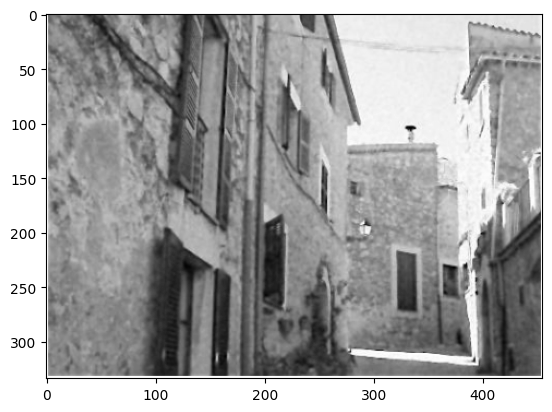

In [128]:
img = cv2.imread('images/self_sim.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Self Similarity 20')

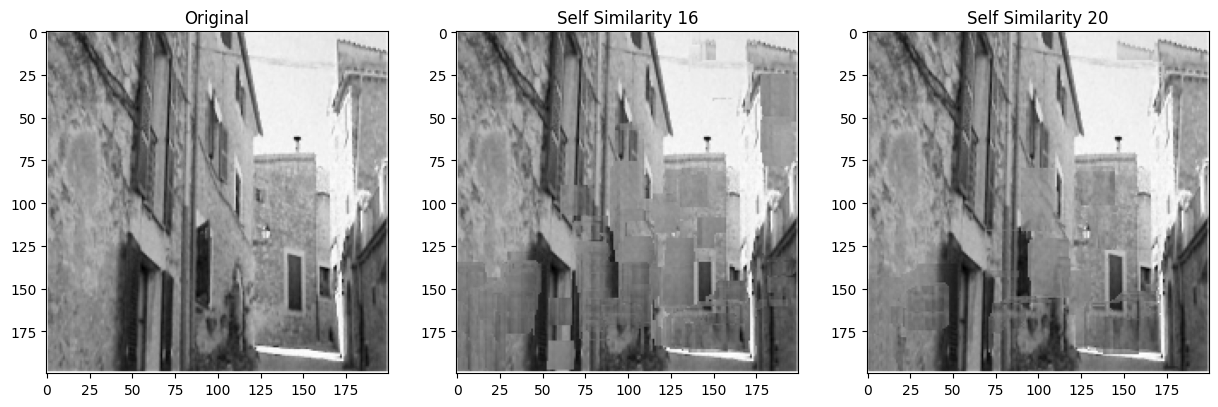

In [131]:
def getIntegralImage(img):
    integral = np.zeros_like(img, dtype=np.int32)
    integral[0,0] = img[0,0]
    for i in range(1, img.shape[0]):
        integral[i,0] = integral[i-1,0] + img[i,0]
    for j in range(1, img.shape[1]):
        integral[0,j] = integral[0,j-1] + img[0,j]
    for i in range(1, img.shape[0]):
        for j in range(1, img.shape[1]):
            integral[i,j] = integral[i-1,j] + integral[i,j-1] - integral[i-1,j-1] + img[i,j]
    return integral

def getSelfSimilarity(img, k_size):
    img_copy = np.copy(img)
    for i in range(img.shape[0]-k_size):
        for j in range(img.shape[1]-k_size):
            vec_pos, vec_mean = [], []
            total = img[i:i+k_size, j:j+k_size].copy()
            for k in range(i, img.shape[0]-k_size, k_size//2):
                for l in range(j, img.shape[1]-k_size, k_size//2):
                    if k == i and l == j: continue
                    second_total = img[k:k+k_size, l:l+k_size].copy()
                    # print(np.sum(np.abs(total - second_total))//k_size**2)
                    if np.sum(np.abs(total - second_total))/(k_size*k_size) <= 50:
                        # print(np.sum(np.abs(total - second_total))//k_size**2)
                        vec_pos.append((k,l))
                        vec_mean.append(img[k:k+k_size, l:l+k_size])
            if len(vec_mean) > 0:
                mean = np.mean(vec_mean, axis=0)
                for x, y in vec_pos:
                    img_copy[x:x+k_size, y:y+k_size] = mean
    return img_copy
            
img = cv2.resize(img, (200, 200))
img_similarity_16 = getSelfSimilarity(img, 16)
img_similarity_20 = getSelfSimilarity(img, 20)
# Plot the images
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_similarity_16, cmap='gray')
ax[1].set_title('Self Similarity 16')
ax[2].imshow(img_similarity_20, cmap='gray')
ax[2].set_title('Self Similarity 20')

Text(0.5, 1.0, 'Noise 20')

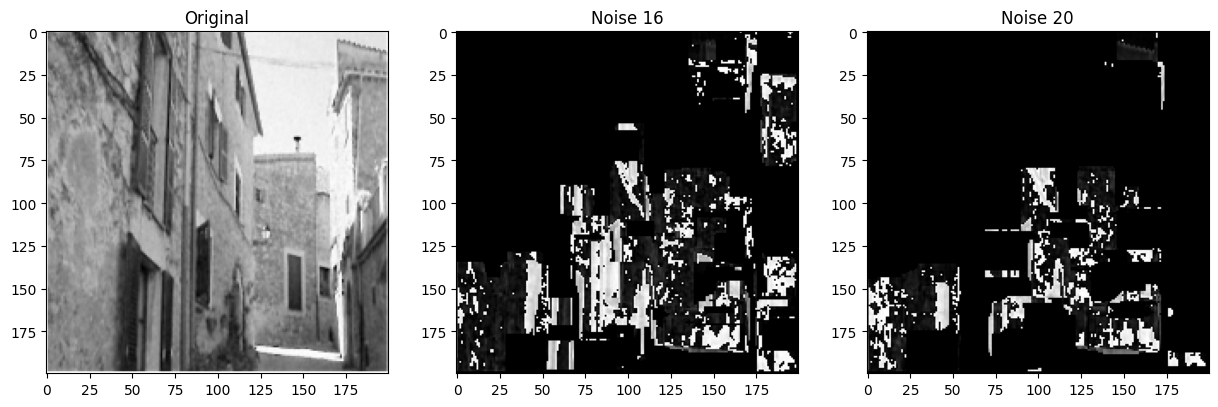

In [133]:
img_noise_16 = img - img_similarity_16
img_noise_20 = img - img_similarity_20
# Plot the images
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_noise_16, cmap='gray')
ax[1].set_title('Noise 16')
ax[2].imshow(img_noise_20, cmap='gray')
ax[2].set_title('Noise 20')